In [1]:
#Import various libraries, which will be used later

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [28]:
L = 10**(-10) #width of the infinite well
A = np.sqrt(2 / L) # normalisation constant
w = 0.2 * L #width of the square perturbation

m = 9.11 * 10**(-31) #Particle mass in Kg (in this case mass of an electron)
e = 1.6 * 10**(-19) #an electron volt
hbar = (6.626 * 10**(-34)) / (2 * np.pi) #Planck's constant divided by 2Pi

N = 100 #number of x-positions over which we will sample
x1 = 0.4 * L #starting point of the perturbation
x2 = 0.6 * L #end point of the perturbation

In [3]:
def energy(n):
    """
    Function to calculate the energy of the particle in an infinite 
    potential well in a particular quantum state
    
    Returns:
        energy : float
                 the energy of the particle
                 
    Parameter:
        n : integer
            the state of the wavefunction
    """
    
    energy = (n**2 * (np.pi)**2 * (hbar**2)) / (2 * m * L**2)
    return energy

In [4]:
def unperturbed(n, x):
    """
    Function to calculate the value of the wavefunction at a given point in the infinite potential well
    
    Returns:
        psi : float
              the value of the wavefunction
        
    Parameters:
        n : integer
            the order of the wavefunction
            
        x : float
            the position of the particle in the infinite potential well
    """
    
    psi = A * np.sin((n * np.pi * x) / L) #the solution to the unperturbed wavefunction in an infinite potential well
    return psi

In [30]:
def perturbation(x):
    """
    A function which allows the user to specify the specific perturbation which they require.
    
    Returns:
        V : float
            the magnitude of the pertuabtion at a specific x-position
            
    Parameters:
        x : float
            the x-position
    """
    
    V = x * 1e-10
    return V

In [6]:
def integral(k, n, x1, x2):
    """
    Function to calculate individual integrals, which will later be summed when finding the first-order
    correction to the wavefunction.
    
    Returns:
        perturb_1 : float
        
    Parameters:
        k : integer
            dummy variable. represents the principle quantum number and is what we will sum over in a later function
        
        n : integer
            principle quantum number
            
        x1 : float
             starting point of the perturbation
            
        x2 : float
             finishing point of the perturbation
    """
    
    if x2 > L or x1 < 0:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'solution' function which is previously defined
            """
            
            return (A * np.sin((n * np.pi * x) / L)) * (np.conj(A * np.sin((k * np.pi * x) / L))) * perturbation(x)
        
        perturb_1 = quad(integrand, x1, x2)
        return perturb_1[0]

In [7]:
def sum_1(n, kmax, x1, x2):
    """
    Function to store integral values which will later be used to find the value of the corrected wavefunction.
    
    Returns:
        sum_1 : array
                array containing coefficients which will be used to find the corrected wavefunction.
        
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        x1 : float
             starting point of the perturbation
            
        x2 : float
             finishing point of the perturbation
    """
    sum_1 = []
    
    for i in range(1, kmax + 1):
        if i == n:
            sum_1 = np.append(sum_1, 0)
        else:
            value = integral(i, n, x1, x2) / (energy(n) - energy(i))
            sum_1 = np.append(sum_1, value)
    
    return sum_1

In [8]:
def psi_correc(n, kmax, x1, x2):
    """
    A function to store the values of the (first-order) corrected wavefunction depending on the 
    specified perturbation.
    
    Returns:
        new_psi : array
                  contains the magnitude of the (first-order) corrected wavefunction for various x-positions
                  
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        x1 : float
             starting point of the perturbation
            
        x2 : float
             finishing point of the perturbation
    """
    
    new_psi = [] #empty array to store (first-order) corrected wavefunctions
    
    for x in np.arange(0, L, L / N):
        value = 0
        
        for i in range(1, kmax + 1):
            value += (sum_1(n, kmax, x1, x2)[i - 1] * unperturbed(i, x))
        
        new_psi = np.append(new_psi, value + unperturbed(n, x))
    
    return new_psi

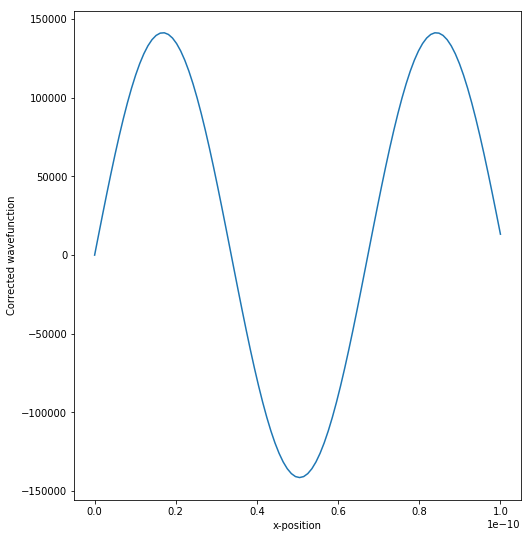

In [31]:
def plot_psi(n, kmax, x1, x2):
    """
    A function to plot the (first-order) corrected wavefunction for an infinite well containing
    a perturbation.
    
    Returns:
        a plot of the wavefunction magnitude against position
      
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        x1 : float
             starting point of the perturbation
            
        x2 : float
             finishing point of the perturbation
    """
    
    x_pos = np.linspace(0, L, N)
    
    #set the size of the figures
    fig = plt.figure(figsize = (8, 9))
    
    ax = fig.add_subplot(111)
     
    #general plot formatting
    ax.plot(x_pos, psi_correc(n, kmax, x1, x2))
    #ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    
    plt.xlabel('x-position')
    plt.ylabel('Corrected wavefunction')
    #plt.title('Energy vs quantum state for an infinite potential well with a central square perturbation')
    return plt.show()

plot_psi(3, 10, x1, x2)